In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap as colormap
from IPython.display import HTML
import math
import os, sys
sys.path.append(os.path.relpath("./src"))
from kitaev_chain import TV_XY_model, kitaev_chain_model, quench_simulation, fermion_chain_from_spin_chain_params
FFwriter=FFMpegWriter(fps=30, extra_args=['-vcodec', 'libx264'])
from utils import to_n, s0, sx, sy, sz, maj_ordered, tensor_product, canon_eigen, expm, U, c, zero, LOSCHMIDT_BDG, LOSCHMIDT_TFIM, STATES

In [26]:
def fermion_chain_from_spin_chain_params(n_sites, J, h_z, h_edges_x):
    n = n_sites + 2
    mu = np.ones(n) * h_z; mu[0] = mu[-1] = 0
    t = np.ones(n - 1) * J; t[0] = t[-1] = h_edges_x
    t *= .5
    delta = -t
    return kitaev_chain_model(n, mu, t, delta, True)

In [27]:
H1 = TV_XY_model(4, 1, 1, 1, [1, 0, 0], [1, 0, 0]).H_bdg()
H2 = fermion_chain_from_spin_chain_params(4, 1, 1, 1).bdg_hamiltonian()

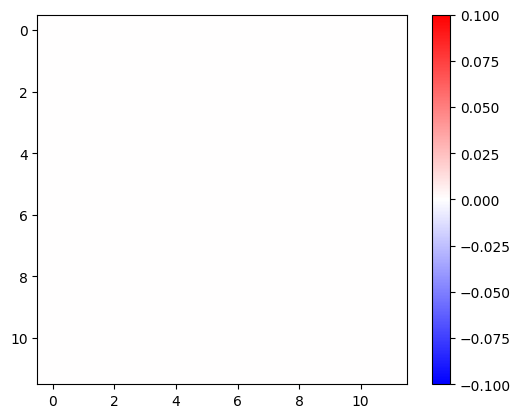

In [28]:
plt.imshow(np.real(H1 - H2), cmap='bwr')
plt.colorbar()